In [0]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from google.colab import files
from google.colab import drive
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/My\ Drive
!pwd

/content/drive/My Drive
/content/drive/My Drive


In [6]:
data1 = pd.read_csv("/content/drive/My Drive/Results/For_randomforest.csv")
data1.head()

,Unnamed: 0,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,...,c160,c161,c162,c163,c164,c165,c166,c167,c168,c169,c170,c171,c172,c173,c174,c175,c176,c177,c178,c179,c180,c181,c182,c183,c184,c185,c186,c187,c188,c189,c190,c191,c192,c193,c194,c195,c196,c197,c198,c199
0,0,0.050332,0.042506,0.000000,0.041635,0.000000,0.023718,0.066143,0.000000,0.000000,0.000000,0.048641,0.000000,0.025533,0.000000,0.019985,0.000000,0.000000,0.000000,0.026297,0.000000,0.000000,0.000000,0.106781,0.000000,0.000000,0.000000,0.000000,0.086608,0.000000,0.000000,0.023202,0.000000,0.000000,0.025834,0.000000,0.000000,0.048778,0.000000,0.026141,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.021364,0.045045,0.000000,0.000000,0.151514,0.000000,0.000000,0.000000,0.064764,0.000000,0.021475,0.000000,0.000000,0.133380,0.052128,0.000000,0.000000,0.000000,0.000000,0.023076,0.104087,0.000000,0.039667,0.046916,0.000000,0.000000,0.000000,0.029347,0.000000,0.000000,0.000000,0.149157,0.000000,0.021308,0.025021
1,1,0.007142,0.008444,0.000000,0.016541,0.022145,0.006731,0.018770,0.016944,0.007374,0.030405,0.005521,0.021440,0.001449,0.000000,0.023819,0.011884,0.013673,0.025128,0.008955,0.022887,0.204945,0.003049,0.000000,0.006554,0.014242,0.094030,0.000000,0.213006,0.003481,0.004884,0.011852,0.001617,0.020229,0.008797,0.003387,0.006515,0.006921,0.010768,0.008902,...,0.000000,0.101267,0.004916,0.013636,0.000000,0.019400,0.011505,0.100267,0.004932,0.029483,0.006960,0.020453,0.006533,0.051461,0.000000,0.017064,0.009118,0.000000,0.056235,0.007396,0.004980,0.089093,0.001644,0.018033,0.013097,0.015360,0.013650,0.059661,0.010651,0.004248,0.001543,0.004837,0.003331,0.004335,0.003077,0.009717,0.007256,0.009063,0.022978,0.008521
2,2,0.010841,0.004104,0.005410,0.004639,0.013979,0.003876,0.003275,0.003696,0.000000,0.010101,0.052747,0.009065,0.007207,0.009375,0.020781,0.008295,0.049589,0.004750,0.007422,0.013644,0.006908,0.012767,0.009914,0.008577,0.004846,0.021876,0.019831,0.003860,0.020956,0.011504,0.013442,0.015664,0.340749,0.019572,0.090871,0.017905,0.009057,0.005234,0.009320,...,0.010095,0.001304,0.003002,0.011104,0.006621,0.009203,0.008030,0.011372,0.008605,0.160123,0.040807,0.012045,0.017526,0.049707,0.002653,0.014356,0.017104,0.010618,0.114918,0.003097,0.007387,0.025505,0.005163,0.003304,0.007884,0.011442,0.361541,0.090156,0.009757,0.005930,0.009693,0.042199,0.000436,0.004160,0.011676,0.010900,0.012661,0.015024,0.078183,0.005575
3,3,0.000000,0.064945,0.000000,0.009088,0.040078,0.020708,0.048125,0.043443,0.000000,0.026985,0.031851,0.000000,0.122611,0.000000,0.087242,0.000000,0.000000,0.010738,0.011480,0.078238,0.000000,0.000000,0.023308,0.000000,0.054772,0.011480,0.000000,0.126028,0.000000,0.050085,0.030387,0.000000,0.000000,0.000000,0.000000,0.000000,0.021294,0.011832,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.083936,0.029497,0.000000,0.000000,0.056694,0.021415,0.098322,0.025124,0.028273,0.015591,0.028125,0.011689,0.000000,0.207953,0.170672,0.000000,0.000000,0.000000,0.000000,0.060444,0.109054,0.031496,0.129875,0.030721,0.000000,0.000000,0.037204,0.000000,0.011114,0.011832,0.032031,0.065114,0.011619,0.037208,0.010923
4,4,0.000000,0.003597,0.005137,0.049331,0.015539,0.028102,0.074638,0.012633,0.000000,0.048827,0.000000,0.004919,0.025931,0.032513,0.057505,0.011814,0.005825,0.029143,0.044512,0.015168,0.013891,0.140926,0.054222,0.004887,0.016990,0.008902,0.000000,0.024433,0.041527,0.038839,0.007855,0.019295,0.004309,0.000000,0.025254,0.000000,0.012385,0.004588,0.022124,...,0.014379,0.019804,0.014660,0.027111,0.000000,0.083170,0.038123,0.024919,0.004902,0.128229,0.012455,0.045747,0.029224,0.116931,0.000000,0.014540,0.018129,0.014518,0.061279,0.008823,0.009902,0.012455,0.009805,0.000000,0.011718,0.031713,0.000000,0.060428,0.003971,0.008446,0.018408,0.019233,0.119215,0.051711,0.022939,0.000000,0.054100,0.013515,0.086560,0.008470


In [0]:
X = pd.read_csv("/content/drive/My Drive/Results/For_randomforest.csv")
Y = pd.read_csv("/content/drive/My Drive/Results/model2_data_target_3.csv")
X = np.array(X.drop(columns=['Unnamed: 0']).values)
Y = np.array(Y.drop(columns=['Unnamed: 0']))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=1, max_depth=4)
mrf = MultiOutputClassifier(rf, n_jobs=-1)
#param_grid = {'n_estimators': [100, 200, 300, 1000], 'max_depth': [2, 4, 6, 8]}
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1, verbose = 2)
#grid_search.fit(X_train, Y_train)
#grid_search.best_params_
model = mrf.fit(X_train, Y_train)
y_pred_test = model.predict(X_test)

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [0]:
best_grid = model
grid_accuracy = evaluate(best_grid, X_test, Y_test)
#y_pred_test[:10]

Model Performance
Average Error: 0.6587 degrees.
Accuracy = 75.66%.


In [0]:
def plot_confusion_matrix(results, class_names):
    actual_y, pred_y = zip(* results)
    cm = confusion_matrix(actual_y, pred_y)
    #disp = cmd(confusion_matrix=cm,display_labels=class_names)
    #disp = disp.plot(include_values=True,cmap=charts.cm.Blues)
    #plt.show()
    def cmd(cm,labels):
        cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
        n_classes = cm.shape[0]
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        plt.xticks(np.arange(n_classes), labels, rotation = 45)
        plt.yticks(np.arange(n_classes), labels)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        thres = (cm.min()+cm.max())/ 2.0
        for i, j in product(range(n_classes), range(n_classes)):
            plt.text(j,i,format(cm[i,j],".2f"),ha="center", va="center",color="white" if cm[i,j]>thres else "black")
        plt.tight_layout()
        plt.savefig("confusion_matrix.png")
        plt.show()
    cmd(cm,class_names)

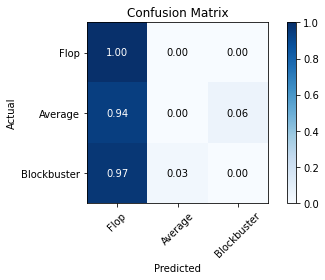

array([0.75376884, 0.        , 0.        ])

In [0]:
from sklearn.metrics import confusion_matrix, f1_score
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

class_names = ['Blockbuster', 'Average', 'Flop'][::-1]
plot_confusion_matrix(zip(Y_test, y_pred_test), class_names)
f1score = f1_score(Y_test, y_pred_test, average=None)
f1score